# Keras_Image_Classification

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

## Data Exploration

In [3]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
classes[3]

'cat'

In [18]:
def plot_img(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

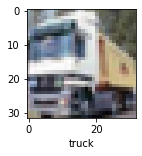

In [19]:
plot_img(X_train,y_train,1)

## Scalling Images

In [9]:
X_train = X_train/255
X_test = X_test/255

## 1st - Simple Nural Natwork

In [10]:
ann = models.Sequential([
    
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
    
])

ann.compile(optimizer='SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.8193 - accuracy: 0.3539
Epoch 2/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.6263 - accuracy: 0.4250
Epoch 3/5
1563/1563 [==============================] - 123s 78ms/step - loss: 1.5428 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 124s 79ms/step - loss: 1.4814 - accuracy: 0.4787
Epoch 5/5
1563/1563 [==============================] - 126s 81ms/step - loss: 1.4345 - accuracy: 0.4939


##  2st - Convolution Nural Natwork

In [13]:
cnn = models.Sequential([
    
    #CNN
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    #Dence
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

In [24]:
cnn.compile(optimizer='adam',
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 53s 33ms/step - loss: 0.8003 - accuracy: 0.7223
Epoch 2/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7515 - accuracy: 0.7393
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7071 - accuracy: 0.7533
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6702 - accuracy: 0.7676
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6391 - accuracy: 0.7793
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6049 - accuracy: 0.7899
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5788 - accuracy: 0.7983
Epoch 8/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.5483 - accuracy: 0.8087
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5248 - accuracy: 0.8158
Epoch 10/10
1563/1563 [==============================] - 51s 33m

In [25]:
cnn.fit(X_test,y_test)

313/313 [==============================] - 11s 35ms/step - loss: 0.9415 - accuracy: 0.6896


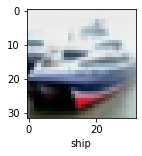

In [26]:
plot_img(X_test,y_test,1)

In [27]:
y_prad = cnn.predict(X_test)
y_prad[:5]

array([[5.0707865e-03, 5.3421594e-02, 7.2911330e-03, 5.1008022e-01,
        1.4632769e-01, 7.5320706e-02, 1.9657844e-01, 5.7220954e-04,
        4.6133352e-03, 7.2397140e-04],
       [1.2804637e-02, 4.5482539e-02, 2.4316594e-04, 1.0603274e-04,
        1.3088707e-05, 5.9528720e-06, 4.4619233e-06, 2.9189385e-07,
        9.3990266e-01, 1.4370899e-03],
       [3.8334336e-02, 1.9279392e-01, 6.5082530e-03, 3.4630168e-03,
        4.5419117e-03, 2.4983421e-04, 3.4689586e-04, 5.3762773e-04,
        6.9006938e-01, 6.3154899e-02],
       [4.8745316e-01, 1.1863578e-02, 6.1292328e-02, 3.3461181e-03,
        4.8178986e-02, 2.0627627e-04, 4.8479089e-04, 8.0246385e-04,
        3.8615155e-01, 2.2071862e-04],
       [7.3858588e-05, 8.4226573e-04, 1.0959976e-02, 2.2907170e-02,
        3.1032261e-01, 1.0831292e-03, 6.5354764e-01, 9.7542952e-06,
        2.2015620e-04, 3.3464537e-05]], dtype=float32)

In [30]:
import numpy as np

np.argmax(y_prad[0])

3

In [31]:
y_class = [np.argmax(element) for element in y_prad]
y_class[:5]

[3, 8, 8, 0, 6]

In [32]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)